In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

#import pandas as pd
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

1.13.1


In [5]:
from numpy.random import seed
seed(2)
from tensorflow import set_random_seed
set_random_seed(2)

In [ ]:
raw = pd.read_csv("E:/MS/Deep Learning/Assignments/Assignment1/online_shoppers_intention.csv")

printing the first 5 rows of the data 

In [4]:
raw.head(5)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
raw.dtypes
raw.info()

In [9]:
raw['Revenue'] = (raw['Revenue']).astype('int')

In [10]:
raw['Weekend'] = (raw['Weekend']).astype('int')

Revenue column is considered as the class variable for this model.
For Classification problems , Classification accuracy is considered as a metric.
seperate the features and target variables accordingly.

In [14]:
# creating input features and target variables
X= raw.iloc[:,0:17]
y= raw.iloc[:,17]

In [15]:
X.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')

generate dummies for categorical variables month and Visitor type using pd.get_dummies

In [17]:
def generate_dummies(df, dummy_column):
    dummies = pd.get_dummies(df[dummy_column], prefix=dummy_column)
    df = pd.concat([df, dummies], axis=1)
    return df

X = pd.DataFrame.copy(X)
dummy_columns = ["Month","VisitorType","OperatingSystems","Browser","Region","TrafficType"
                ]
for dummy_column in dummy_columns:
    X = generate_dummies(X, dummy_column)

In [18]:
X.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [19]:
for dummy_column in dummy_columns:
    del X[dummy_column]

X.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [21]:
X.shape

(12330, 28)

In [22]:
# # creating input features and target variables
# X= dataset.iloc[:,0:8]
# y= dataset.iloc[:,15]

In [23]:
X.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
#standardizing the input feature to maintain the same scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

E:\Anaconda3.7\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\Anaconda3.7\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.69699296, -0.4571914 , -0.3964779 , ..., -0.39908696,
        -0.08331632,  0.41062101],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.39908696,
        -0.08331632,  0.41062101],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.39908696,
        -0.08331632,  0.41062101],
       ...,
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.39908696,
        -0.08331632,  0.41062101],
       [ 0.50722805, -0.03291592, -0.3964779 , ..., -0.39908696,
        -0.08331632,  0.41062101],
       [-0.69699296, -0.4571914 , -0.3964779 , ...,  2.50571955,
        -0.08331632, -2.43533571]])

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
X_train.shape

(9864, 28)

In [27]:
y_train.shape

(9864,)

In [28]:
y_train.value_counts()
y_test.value_counts()/y_test.value_counts().sum()

0    0.85807
1    0.14193
Name: Revenue, dtype: float64

##### 0.85807
This means that a baseline model always predicts class/label 0 ,would be right 84.6% of the time

we need to  Build a model , compile and fit using loss function binary_crossEntropy, optimizer - Adam.
 Accuracy is considered as a metric for the classification problem

In [29]:
# create model
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(14 ,input_dim=28, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, y, epochs=50,batch_size=10)
# evaluate the model
scores = model.evaluate(X, y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


Using TensorFlow backend.


Epoch 1/50
12330/12330 [==============================] - 1s 98us/step - loss: 0.3358 - acc: 0.8617
Epoch 2/50
12330/12330 [==============================] - 1s 66us/step - loss: 0.2658 - acc: 0.8904
Epoch 3/50
12330/12330 [==============================] - 1s 84us/step - loss: 0.2526 - acc: 0.8955
Epoch 4/50
12330/12330 [==============================] - 1s 76us/step - loss: 0.2443 - acc: 0.8966
Epoch 5/50
12330/12330 [==============================] - 1s 74us/step - loss: 0.2386 - acc: 0.8988
Epoch 6/50
12330/12330 [==============================] - 1s 75us/step - loss: 0.2341 - acc: 0.9001
Epoch 7/50
12330/12330 [==============================] - 1s 84us/step - loss: 0.2316 - acc: 0.9022
Epoch 8/50
12330/12330 [==============================] - 1s 81us/step - loss: 0.2297 - acc: 0.9033
Epoch 9/50
12330/12330 [==============================] - 1s 82us/step - loss: 0.2276 - acc: 0.9041
Epoch 10/50
12330/12330 [==============================] - 1s 73us/step - loss: 0.2264 - acc: 0.9048

In [38]:
from keras import Sequential
from keras.layers import Dense
model2 = Sequential()
#First Hidden Layer
model2.add(Dense(14, activation='relu',input_dim=28))
#Second  Hidden Layer
model.add(Dense(14, activation=tf.nn.relu))
model2.add(Dense(1, activation=tf.nn.sigmoid))

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 14)                406       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 15        
Total params: 421
Trainable params: 421
Non-trainable params: 0
_________________________________________________________________


In [39]:
#Compiling the neural network
model2.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])


In [42]:
#Fitting the data to the training dataset
history = model2.fit(X_train,y_train, batch_size=10, epochs=10,validation_data = (X_test, y_test))


Train on 9864 samples, validate on 2466 samples
Epoch 1/10
9864/9864 [==============================] - 1s 122us/step - loss: 0.2218 - acc: 0.9052 - val_loss: 0.2395 - val_acc: 0.8954
Epoch 2/10
9864/9864 [==============================] - 1s 123us/step - loss: 0.2219 - acc: 0.9062 - val_loss: 0.2381 - val_acc: 0.8974
Epoch 3/10
9864/9864 [==============================] - 1s 120us/step - loss: 0.2208 - acc: 0.9056 - val_loss: 0.2370 - val_acc: 0.8933
Epoch 4/10
9864/9864 [==============================] - 1s 105us/step - loss: 0.2204 - acc: 0.9066 - val_loss: 0.2376 - val_acc: 0.8938
Epoch 5/10
9864/9864 [==============================] - 1s 120us/step - loss: 0.2203 - acc: 0.9060 - val_loss: 0.2387 - val_acc: 0.8950
Epoch 6/10
9864/9864 [==============================] - 1s 125us/step - loss: 0.2197 - acc: 0.9064 - val_loss: 0.2389 - val_acc: 0.8946
Epoch 7/10
9864/9864 [==============================] - 1s 121us/step - loss: 0.2191 - acc: 0.9064 - val_loss: 0.2381 - val_acc: 0.8933


The validation accuracy with this model is 89% which is better than base line 

In [43]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

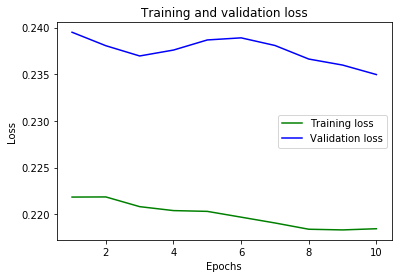

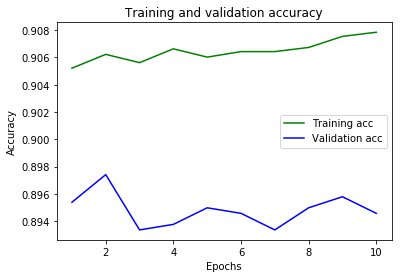

In [46]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'g', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

From the above plot we can see that the training accuracy increases with each epoch. This is expected when using a gradient descent optimization—it should minimize the desired quantity on every iteration.
In the case for the validation loss and accuracy,the model performs better on the training data than it does on data it has never seen before.

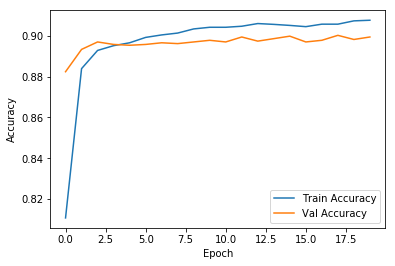

In [35]:
import matplotlib.pyplot as plt

def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['acc']),
           label='Train Accuracy')
  plt.plot(history.epoch, np.array(history.history['val_acc']),
           label = 'Val Accuracy')
  plt.legend()
    
plot_history(history)   

When done on the validation data,the values started picking up at 88 and then maintained the same values meaning that the model has  memorized the data.

In [36]:
y_pred=model.predict(X_test)
y_pred =(y_pred>0.5)

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2013  103]
 [ 145  205]]
